In [1]:
import numpy as np
import pandas as pd
from scipy import stats

songs=pd.read_csv('data/tracks.csv')
songs=songs.sample(n=30000)

In [2]:
songs_for_neural = songs.copy()
songs_for_neural.set_index('id',inplace=True)

In [3]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'artists','name','release_date'] 

In [4]:
songs_for_neural['year'] = pd.DatetimeIndex(songs_for_neural['release_date']).year
songs_for_neural['month'] = pd.DatetimeIndex(songs_for_neural['release_date']).month

In [5]:
import sklearn
from sklearn import preprocessing

def scaler(dataframe,to_be_scaled):
    scaler = sklearn.preprocessing.StandardScaler(copy = True)
    dataframe[to_be_scaled] = scaler.fit_transform(dataframe[to_be_scaled].to_numpy())
# to_be_scaled = ['popularity','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']
to_be_scaled = ['loudness','duration_ms','tempo']

In [6]:
drop_columns(songs_for_neural,to_be_deleted)#delete columns
songs_for_neural["key"] = songs_for_neural["key"].astype("category")
songs_for_neural = pd.get_dummies(songs_for_neural, columns=["key"])

# Delete Outliers

In [7]:
songs_for_neural.describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,27.731733,2.296960e+05,0.043833,0.563348,0.543788,-10.172475,0.658033,0.105208,0.449119,0.111829,...,0.111367,0.038300,0.080067,0.092233,0.051600,0.125667,0.057200,0.108567,0.065133,0.067600
std,18.355384,1.229395e+05,0.204728,0.165533,0.251292,5.067348,0.474376,0.180575,0.348342,0.265804,...,0.314591,0.191923,0.271401,0.289360,0.221222,0.331479,0.232228,0.311100,0.246765,0.251062
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.755542e+05,0.000000,0.453000,0.346000,-12.859000,0.000000,0.034000,0.097900,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,2.157665e+05,0.000000,0.577000,0.551000,-9.236000,1.000000,0.044400,0.420000,0.000023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,2.635470e+05,0.000000,0.685000,0.749000,-6.456000,1.000000,0.076900,0.782000,0.008692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,4.585640e+06,1.000000,0.991000,0.999000,3.498000,1.000000,0.969000,0.996000,0.997000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def remove_outliers(songs_for_neural,outling_variable):
    index_of_outliers = (np.abs(stats.zscore(songs_for_neural[outling_variable])) >= 3)
    normal_songs = set(index_of_outliers[~index_of_outliers].index)
    songs_for_neural = songs_for_neural[songs_for_neural.index.isin(normal_songs)]
    return songs_for_neural 

In [9]:
to_remove_outliers = ['duration_ms','danceability','loudness','acousticness']

In [10]:
# for i in to_remove_outliers:
#     songs_for_neural = remove_outliers(songs_for_neural,i)
#     print(i,len(songs_for_neural))

# Scale

In [11]:
# scaler(songs_for_neural,to_be_scaled)

In [12]:
songs_for_neural.dropna(inplace=True)

In [13]:
x = songs_for_neural['valence']
del songs_for_neural["valence"]
songs_for_neural['valence'] = x 

# AND SO IT BEGINS

In [14]:
songs_for_neural

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,valence
id,,,,,,,,,,,,,,,,,,,,,
5b7Px47PuvYFg2wjgymcRH,53,247886,0,0.608,0.6400,-8.287,1,0.0296,0.36400,0.000000,...,0,0,0,0,1,0,0,0,0,0.316
7zSsN57X2ryosUKCjWpyWK,7,225453,0,0.553,0.4940,-8.722,1,0.0334,0.49000,0.000565,...,0,0,0,0,0,0,0,0,0,0.434
0GPFq2mWMC6jKfTGDkAL9F,52,197978,0,0.807,0.6550,-8.144,0,0.0442,0.00251,0.007770,...,0,0,0,0,0,0,1,0,0,0.841
5QIRLDAnBbrKYny9foynps,38,293493,0,0.615,0.5580,-5.107,0,0.4250,0.46200,0.000000,...,0,1,0,0,0,0,0,0,0,0.865
7IuRomSqHDLie1xEOTTxcZ,20,206973,0,0.628,0.4270,-9.463,0,0.1450,0.78700,0.000004,...,0,0,0,0,0,1,0,0,0,0.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6ujxdVi02sAjXJecWaE391,0,129828,0,0.704,0.3040,-17.602,1,0.9500,0.76900,0.000000,...,0,0,0,0,0,0,0,0,0,0.771
4TAAWEvGa0IFfzXuwtokIZ,9,225013,0,0.499,0.0739,-21.382,0,0.0663,0.98400,0.952000,...,0,1,0,0,0,0,0,0,0,0.184
0Y9r0YjZXcvsfVjZb8n27D,26,198920,0,0.370,0.7280,-3.720,1,0.0323,0.38500,0.000000,...,0,0,1,0,0,0,0,0,0,0.374


In [15]:
songs_for_neural_array = songs_for_neural.values

In [16]:
X = songs_for_neural_array[:,0:27]

In [17]:
Y = songs_for_neural_array[:,27]

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(21000, 27) (4500, 27) (4500, 27) (21000,) (4500,) (4500,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
from keras.layers import Dropout
from keras import regularizers
from tensorflow import keras

In [22]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(27,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1),
])

In [23]:
model.compile(optimizer='adam',
              loss='mean_absolute_error')

In [24]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/100
657/657 [==============================] - 2s 2ms/step - loss: 0.2089 - val_loss: 0.1657
Epoch 2/100
657/657 [==============================] - 1s 2ms/step - loss: 0.1752 - val_loss: 0.1612
Epoch 3/100
657/657 [==============================] - 1s 2ms/step - loss: 0.1647 - val_loss: 0.1531
Epoch 4/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1589 - val_loss: 0.1509
Epoch 5/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1549 - val_loss: 0.1444
Epoch 6/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1532 - val_loss: 0.1436
Epoch 7/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1512 - val_loss: 0.1494
Epoch 8/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1499 - val_loss: 0.1447
Epoch 9/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1495 - val_loss: 0.1421
Epoch 10/100
657/657 [==============================] - 1s 1ms/step - loss: 0.1477 - val_lo

In [25]:
model.evaluate(X_test, Y_test,verbose=0)

0.13883846998214722

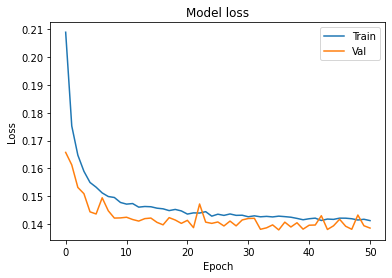

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

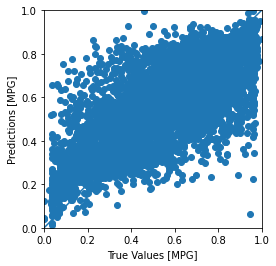

In [27]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Neural second approach

In [28]:
songs_for_neural

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,valence
id,,,,,,,,,,,,,,,,,,,,,
5b7Px47PuvYFg2wjgymcRH,53,247886,0,0.608,0.6400,-8.287,1,0.0296,0.36400,0.000000,...,0,0,0,0,1,0,0,0,0,0.316
7zSsN57X2ryosUKCjWpyWK,7,225453,0,0.553,0.4940,-8.722,1,0.0334,0.49000,0.000565,...,0,0,0,0,0,0,0,0,0,0.434
0GPFq2mWMC6jKfTGDkAL9F,52,197978,0,0.807,0.6550,-8.144,0,0.0442,0.00251,0.007770,...,0,0,0,0,0,0,1,0,0,0.841
5QIRLDAnBbrKYny9foynps,38,293493,0,0.615,0.5580,-5.107,0,0.4250,0.46200,0.000000,...,0,1,0,0,0,0,0,0,0,0.865
7IuRomSqHDLie1xEOTTxcZ,20,206973,0,0.628,0.4270,-9.463,0,0.1450,0.78700,0.000004,...,0,0,0,0,0,1,0,0,0,0.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6ujxdVi02sAjXJecWaE391,0,129828,0,0.704,0.3040,-17.602,1,0.9500,0.76900,0.000000,...,0,0,0,0,0,0,0,0,0,0.771
4TAAWEvGa0IFfzXuwtokIZ,9,225013,0,0.499,0.0739,-21.382,0,0.0663,0.98400,0.952000,...,0,1,0,0,0,0,0,0,0,0.184
0Y9r0YjZXcvsfVjZb8n27D,26,198920,0,0.370,0.7280,-3.720,1,0.0323,0.38500,0.000000,...,0,0,1,0,0,0,0,0,0,0.374


In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [30]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

dl_model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', input_shape=(27,)),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    
    layers.Dense(1),
])

dl_model.compile(
    optimizer="adam",
    loss="mae",
)

history = dl_model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=265,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
)



Epoch 1/100
80/80 [==============================] - 1s 5ms/step - loss: 0.5750 - val_loss: 0.3272
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3539 - val_loss: 0.2576
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2674 - val_loss: 0.2158
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2229 - val_loss: 0.1903
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1986 - val_loss: 0.1796
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1837 - val_loss: 0.1656
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1754 - val_loss: 0.1587
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1690 - val_loss: 0.1560
Epoch 9/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1651 - val_loss: 0.1532
Epoch 10/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1622 - val_loss: 0.1549
Epoch 11/

Minimum validation loss: 0.1374276578426361


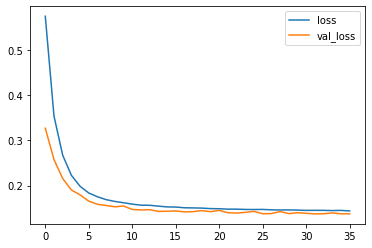

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))